<a href="https://colab.research.google.com/github/prakharsrivastava/powerbi/blob/main/Data_Science_on_Google_Cloud_Platform_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/chapter2/


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/chapter2


In [37]:
!pip install findspark 
!pip install  pyspark




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import findspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("architectinaction.com").getOrCreate()

In [39]:
%pip install pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.cloud import bigquery

In [41]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [42]:
%%sql
sqlite:///mydb_

'Connected: @mydb_'

In [43]:
import pandas as pd
airports = pd.read_csv('airports.csv',low_memory=False,nrows=3)
flight = pd.read_json('flights_sample.json',lines=True)

In [44]:
sparkAirportsDF=spark.createDataFrame(airports)
sparkFlightDF=spark.createDataFrame(flight)

In [25]:
sparkAirportsPandas = sparkAirportsDF.toPandas()
sparkFlightDF

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC_SEQ_ID2,AIRPORT_WAC,AIRPORT_COUNTRY_NAME,AIRPORT_COUNTRY_CODE_ISO,AIRPORT_STATE_NAME,...,LON_HEMISPHERE,LON_MINUTES,LON_SECONDS,LONGITUDE,UTC_LOCAL_TIME_VARIATION,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST,Unnamed: 32
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",101,1,United States,US,Alaska,...,W,54,24,-152.906667,NaN,2007-07-01,NaN,0,1,NaN
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",101,1,United States,US,Alaska,...,W,4,18,-161.071667,NaN,2007-07-01,NaN,0,1,NaN
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",101,1,United States,US,Alaska,...,W,10,0,-163.166667,NaN,2007-07-01,NaN,0,1,NaN


In [46]:
sparkFlightDF.show()

+----------+--------------+---------------------+------+-------------------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+--------+
|   FL_DATE|UNIQUE_CARRIER|ORIGIN_AIRPORT_SEQ_ID|ORIGIN|DEST_AIRPORT_SEQ_ID|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|DISTANCE|
+----------+--------------+---------------------+------+-------------------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+--------+
|2015-04-28|            EV|              1000101|   ABE|            1000101| ATL|        1600|    1555|       -5|       7|      1602|     1747|      4|        1809|    1751|      -18|    false|   false|     692|
|2015-11-05|            DL|              1000101|   ABE|            1000101| ATL|         600|     556|       -4|      12|       608|      749|     10| 

In [28]:

import sqlite3
conn = sqlite3.connect('mydb_')
c = conn.cursor()
flight.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [9]:
import pandas as pd
df = pd.read_json('flights_sample.json',lines=True)

import sqlite3
conn = sqlite3.connect('mydb_')
c = conn.cursor()
df.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [29]:
%%sql
SELECT
  count()
FROM flights_view_

 * sqlite:///mydb_
Done.


count()
4


In [30]:
%%sql
SELECT
  -18/COUNT(arr_delay) AS frac_delayed
FROM flights_view_

 * sqlite:///mydb_
Done.


frac_delayed
-9


In [31]:
df.describe()

,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DISTANCE
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.0
mean,1000101.0,1000101.0,1100.000000,1055.500000,-4.500000,9.500000,1105.00000,1248.000000,7.000000,1313.50000,1255.000000,-18.500000,692.0
std,0.0,0.0,707.106781,706.399674,0.707107,3.535534,702.86414,705.692568,4.242641,700.74282,701.449927,0.707107,0.0
min,1000101.0,1000101.0,600.000000,556.000000,-5.000000,7.000000,608.00000,749.000000,4.000000,818.00000,759.000000,-19.000000,692.0
25%,1000101.0,1000101.0,850.000000,805.750000,-4.750000,8.250000,856.50000,998.500000,5.500000,1065.75000,1007.000000,-18.750000,692.0
50%,1000101.0,1000101.0,1100.000000,1055.500000,-4.500000,9.500000,1105.00000,1248.000000,7.000000,1313.50000,1255.000000,-18.500000,692.0
75%,1000101.0,1000101.0,1350.000000,1305.250000,-4.250000,10.750000,1353.50000,1497.500000,8.500000,1561.25000,1503.000000,-18.250000,692.0
max,1000101.0,1000101.0,1600.000000,1555.000000,-4.000000,12.000000,1602.00000,1747.000000,10.000000,1809.00000,1751.000000,-18.000000,692.0


In [50]:
sparkFlightDF=sparkFlightDF.select("ARR_DELAY","DEP_DELAY")
sparkFlightDF.toPandas()

,ARR_DELAY,DEP_DELAY
0,-18,-5
1,-19,-4


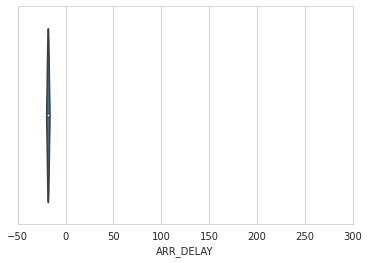

In [48]:
sns.set_style("whitegrid")
# sns.set(font_scale = 1.5)
ax = sns.violinplot(data=df, x='ARR_DELAY', inner='box', orient='h')
ax.axes.set_xlim(-50, 300);

In [ ]:
#https://github.com/GoogleCloudPlatform/data-science-on-gcp/blob/main/05_bqnotebook/exploration.ipynb